<center><h1><strong>Emotion Detector</strong></h1>
<h2> Author: Muhammad Taimoor Khan </h2>

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense 

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

### Building Model To Train

In [2]:
model_base = MobileNet(input_shape=(224,224,3), include_top=False) #weights

for layer in model_base.layers:
    layer.trainable = False
    
x = Flatten()(model_base.output)
x = Dense(units=7, activation='softmax')(x)

# creating the model
model = Model(model_base.input, x)



17225924/17225924 [==============================] - 18s 1us/step


In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [11]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

### Preparing Data

In [5]:
train_datageneration = ImageDataGenerator(
    zoom_range=0.3,
    shear_range=0.3,
    horizontal_flip=True,
    rescale=1./255
)

train_data = train_datageneration.flow_from_directory(directory="./train", target_size=(224,224), batch_size=32)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [6]:
val_datageneration = ImageDataGenerator(rescale=1/255)

In [7]:
val_data = val_datageneration.flow_from_directory(directory="./train", target_size=(224,224), batch_size=32)

Found 350 images belonging to 7 classes.


### Visualizing The Data

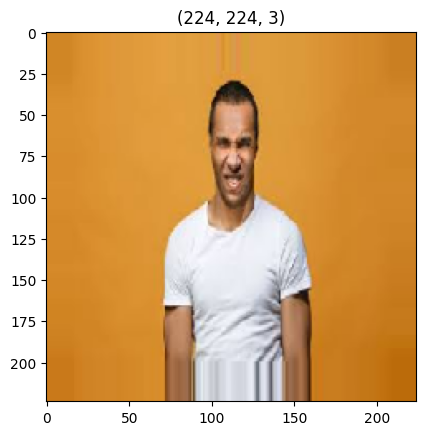

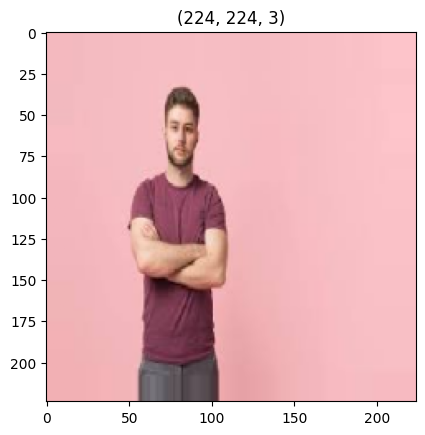

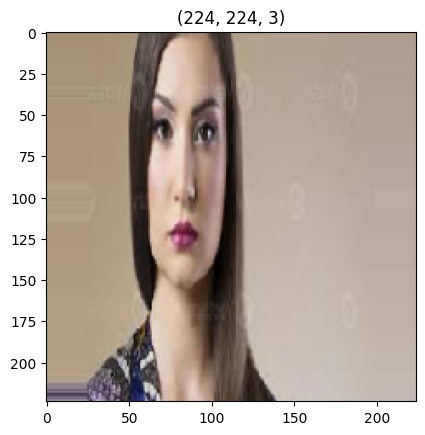

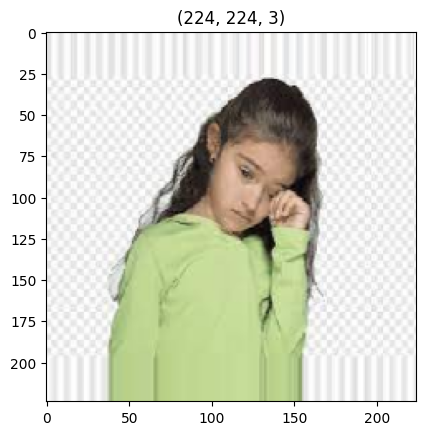

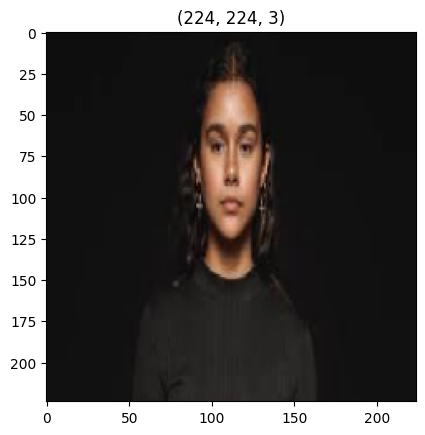

In [8]:
# to visualize images in the training data generator
train_img, label = next(train_data)

# function when called will prot the images
def PlotImages(img_arr, label):
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()
        
        count += 1
        if count == 5:
            break
        
# calling the function
PlotImages(train_img, label)

### Early Stopping & Model Checkpoint

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath="best_model.keras", monitor="val_accuracy", verbose=1, save_best_only=True, mode='auto')

call_back = [es,mc]

In [14]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=8,
                           callbacks=[es,mc])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5664\2669849968.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.6776 - accuracy: 0.7219
Epoch 1: val_accuracy improved from 0.68359 to 0.83984, saving model to best_model.h5


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 17s 2s/step - loss: 1.6776 - accuracy: 0.7219 - val_loss: 0.7779 - val_accuracy: 0.8398
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.3137 - accuracy: 0.7642
Epoch 2: val_accuracy improved from 0.83984 to 0.89453, saving model to best_model.h5
10/10 [==============================] - 21s 2s/step - loss: 1.3137 - accuracy: 0.7642 - val_loss: 0.4810 - val_accuracy: 0.8945
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.8801 - accuracy: 0.8522
Epoch 3: val_accuracy improved from 0.89453 to 0.89844, saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 0.8801 - accuracy: 0.8522 - val_loss: 0.4836 - val_accuracy: 0.8984
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.4523 - accuracy: 0.9025
Epoch 4: val_accuracy improved from 0.89844 to 0.94531, saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 0.4523 - acc

In [15]:
# loading the best fit model
from keras.models import load_model
model = load_model("./best_model.keras")

In [16]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

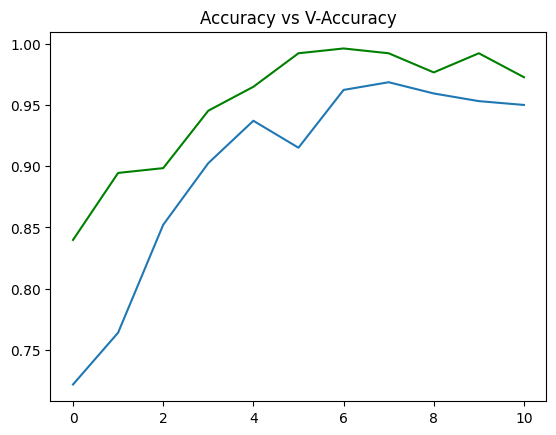

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "green")
plt.title("Accuracy vs V-Accuracy")
plt.show()

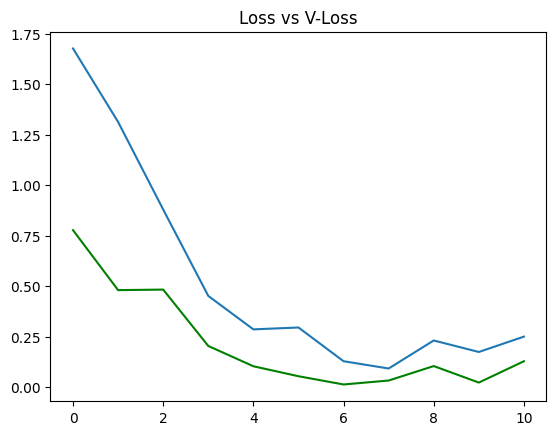

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "green")
plt.title("Loss vs V-Loss")
plt.show()

In [21]:
# to map output values
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 79ms/step
The image is of 'Happy' class


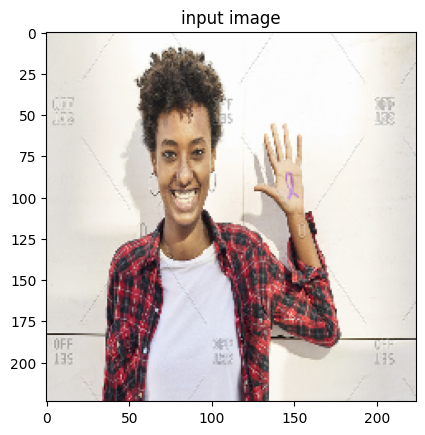

In [24]:
# check if the model predicts correct class
path = "./image.jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

prediction = np.argmax(model.predict(input_arr))
print(f"The image is of '{op[prediction]}' class")

# display image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

<code> Our Model have predicted the class correctly! </code>

<h4> <strong>Let's Try it in Real-Time</strong> check out <code>"videotester.py"</code></h4>